In [1]:
from __future__ import print_function

import keras

Using TensorFlow backend.


In [2]:
# keras can be update with `pip install -U keras`
print(keras.__version__)

2.0.2


In [3]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout


batch_size = 128
num_classes = 10
#epochs = 20
epochs = 5

In [4]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)


In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

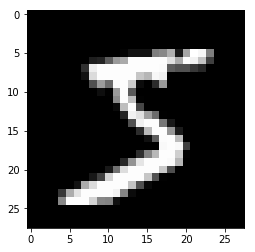

In [7]:
plt.imshow(x_train[0], cmap='gray')

In [8]:
print(y_train[0])

5


In [9]:
print(y_train[:5])

[5 0 4 1 9]


In [10]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


#### Try RandomForest Classification on MNIST

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [12]:
rf.fit(x_train, y_train)   # this may take a while

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [13]:
rf.score(x_test, y_test)

0.94640000000000002

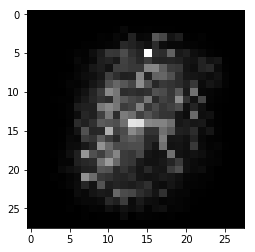

In [14]:
# visualize feature importance map
importance = rf.feature_importances_.reshape(28, 28)
plt.imshow(importance, cmap='gray')

In [15]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [16]:
print(y_train[:5])

[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


#### Build and train a MLP model

In [17]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706.0
Trainable params: 669,706.0
Non-trainable params: 0.0
_________________________________________________________________


In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [19]:
# Press shift-tab in jupyter to show function parameters

In [20]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s - loss: 0.2435 - acc: 0.9257 - val_loss: 0.1075 - val_acc: 0.9659

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0787574100879
Test accuracy: 0.9802


In [22]:
'''Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

'Trains a simple deep NN on the MNIST dataset.\nGets to 98.40% test accuracy after 20 epochs\n(there is *a lot* of margin for parameter tuning).\n2 seconds per epoch on a K520 GPU.\n'

In [23]:
y_pred = model.predict(x_test)

In [24]:
print(y_test[:5])
print(y_pred[:5])

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]
[[  1.87007653e-17   5.29933389e-12   2.59093875e-12   2.96881852e-10
    8.08906435e-19   6.39150013e-15   1.63785100e-23   1.00000000e+00
    7.19419302e-15   1.03148290e-09]
 [  6.43833449e-16   3.33331496e-09   1.00000000e+00   2.64955983e-12
    3.56754456e-22   3.44061717e-19   1.66635896e-19   2.44504260e-14
    7.88634007e-15   9.54051378e-21]
 [  1.55515392e-11   9.99996424e-01   7.31928251e-09   4.03330480e-09
    2.46713626e-06   2.05845225e-08   1.52391646e-08   3.28018899e-07
    6.68271468e-07   1.79744930e-08]
 [  9.99985456e-01   9.14954779e-10   1.18677031e-06   6.72500562e-08
    7.75793367e-08   5.69514995e-08   1.17601812e-05   1.40831361e-07
    1.19792869e-08   1.15553917e-06]
 [  1.14760507e-10   2.61546410e-11   1.42994105e-09   2.25621102e-11
    9.

In [25]:
import numpy as np
print('y_pred:', np.argmax(y_pred[:5], axis=1))
print('y_test:', np.argmax(y_test[:5], axis=1))

y_pred: [7 2 1 0 4]
y_test: [7 2 1 0 4]


#### Build and train a CNN model

In [26]:
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [27]:
batch_size = 128
num_classes = 10
#epochs = 12
epochs = 2

# input image dimensions
img_rows, img_cols = 28, 28

In [28]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [29]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [30]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [32]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 136s - loss: 0.3459 - acc: 0.8937 - val_loss: 0.0796 - val_acc: 0.9749

In [33]:
#Trains a simple convnet on the MNIST dataset.
#Gets to 99.25% test accuracy after 12 epochs
#(there is still a lot of margin for parameter tuning).
#16 seconds per epoch on a GRID K520 GPU.

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0532738594474
Test accuracy: 0.9823
